In [26]:
!pip install gdown
!pip install livelossplot
!pip install opencv-python
!pip install livelossplot
!pip install scikit-plot

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile
import gdown
import random

In [3]:
file_id = "1HLwD1RHMyxvvKFhNcjp0-5mAMFBq71eu"

output_file = 'datasetA.zip'

# Download the file using gdown
!gdown --id $file_id -O $output_file

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:130: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From (uriginal): https://drive.google.com/uc?id=1HLwD1RHMyxvvKFhNcjp0-5mAMFBq71eu
From (redirected): https://drive.google.com/uc?id=1HLwD1RHMyxvvKFhNcjp0-5mAMFBq71eu&confirm=t&uuid=ff5ec654-5497-447d-a326-721b5a6601b7
To: /home/jupyter/datasetA.zip
100%|████████████████████████████████████████| 420M/420M [00:09<00:00, 44.2MB/s]


In [4]:
!unzip -q "datasetA.zip" -d ""

In [2]:
datadirectory = "datasetA/"

In [3]:
classes = ['angry','happy', 'sad', 'neutral']

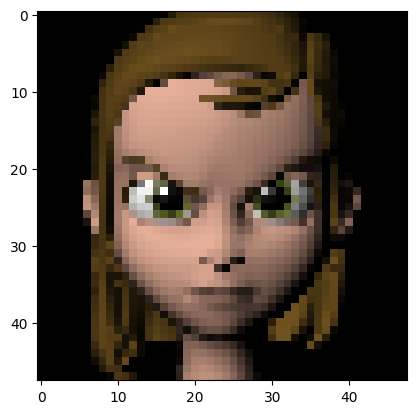

In [4]:
for category in classes:
    path = os.path.join(datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

In [5]:
# read the all the images and convertion them to array

training_data = []
img_size = 48

def create_training_data():
    for category in classes:
        path = os.path.join(datadirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass



In [6]:
create_training_data()

In [7]:
print(len(training_data))

60000


In [8]:

random.shuffle(training_data)

In [9]:
x = [] ## data/feature
y = [] ## label

for features, label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3)


In [10]:
x.shape
x = x / 255.0   # normalize the data

In [11]:
y = np.array(y)
y.shape

(60000,)

In [12]:
# deep learning model for training - Transfer learning
import pandas as pd

import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from livelossplot.inputs.keras import PlotLossesCallback


from tensorflow.keras.callbacks import EarlyStopping

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [13]:

def build_net(optim):
    net = Sequential(name='DCNN')

    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            input_shape=(img_size, img_size, 3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_1'))
    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_2'
        )
    )
    net.add(BatchNormalization(name='batchnorm_2'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
    net.add(Dropout(0.4, name='dropout_1'))

    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_3'
        )
    )
    net.add(BatchNormalization(name='batchnorm_3'))
    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_4'
        )
    )
    net.add(BatchNormalization(name='batchnorm_4'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
    net.add(Dropout(0.4, name='dropout_2'))

    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_5'
        )
    )
    net.add(BatchNormalization(name='batchnorm_5'))
    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_6'
        )
    )
    net.add(BatchNormalization(name='batchnorm_6'))
    
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
    net.add(Dropout(0.5, name='dropout_3'))

    net.add(Flatten(name='flatten'))
        
    net.add(
        Dense(
            128,
            activation='elu',
            kernel_initializer='he_normal',
            name='dense_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_7'))
    
    net.add(Dropout(0.6, name='dropout_4'))
    
    net.add(
        Dense(
            units = len(classes),
            activation='softmax',
            name='out_layer'
        )
    )
    
    net.compile(
        loss='sparse_categorical_crossentropy',
        optimizer= optim,
        metrics=['accuracy']
    )
    
    net.summary()
    
    return net

In [14]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

plot_loss_1 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights

tl_checkpoint_1 = ModelCheckpoint(filepath='CNND_VD01.h5',
                                  save_best_only=True,
                                  verbose=1)


callbacks = [
    tl_checkpoint_1,early_stopping, plot_loss_1, lr_scheduler
]

In [15]:
batch_size = 32
epochs = 100
verbose = 1

optims = [
  optimizers.Nadam(
      learning_rate=0.001,
      beta_1=0.9,
      beta_2=0.999,
      epsilon=1e-07,
      name='Nadam'),
    
  optimizers.Adam(0.001),
]

In [16]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)

train_datagen.fit(x_train)

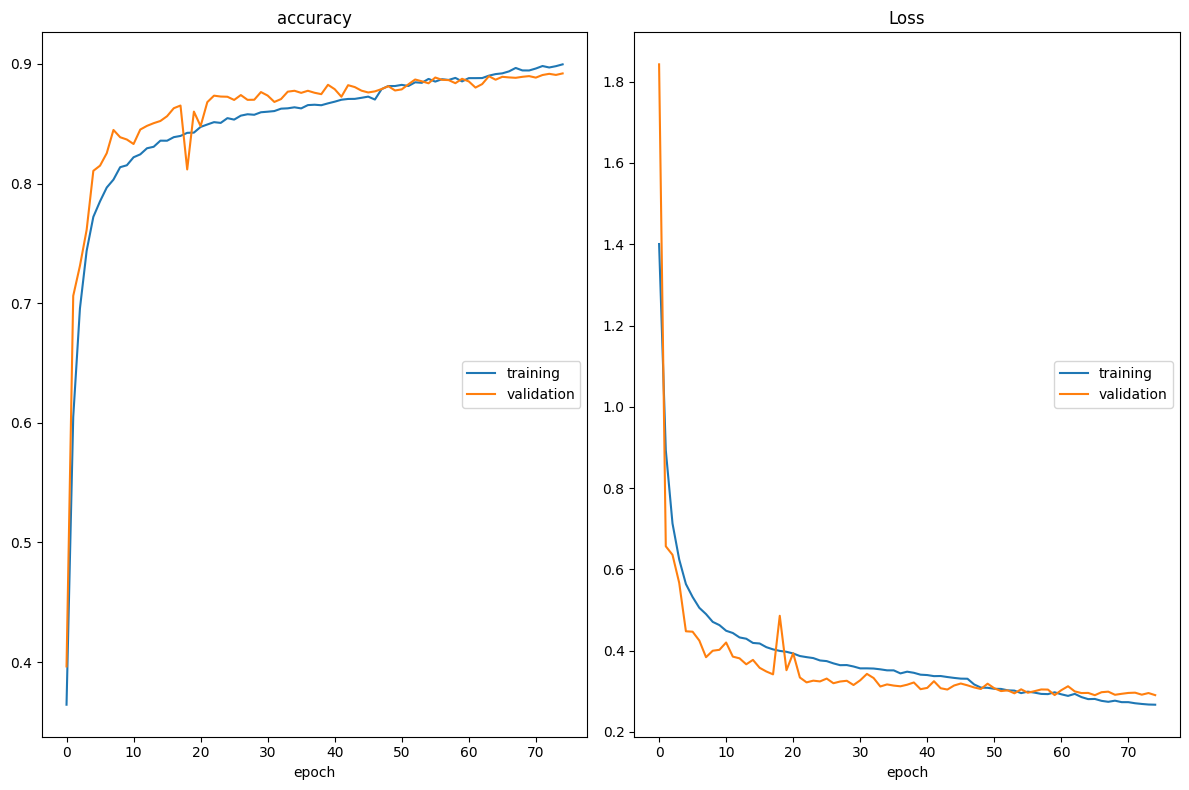

accuracy
	training         	 (min:    0.364, max:    0.900, cur:    0.900)
	validation       	 (min:    0.396, max:    0.892, cur:    0.892)
Loss
	training         	 (min:    0.267, max:    1.400, cur:    0.267)
	validation       	 (min:    0.290, max:    1.843, cur:    0.290)
1500/1500 [==============================] - 1132s 755ms/step - loss: 0.2670 - accuracy: 0.8997 - val_loss: 0.2905 - val_accuracy: 0.8921 - lr: 1.2500e-04
Epoch 76/100
 149/1500 [=>............................] - ETA: 15:55 - loss: 0.2715 - accuracy: 0.8962

In [ ]:

model = build_net(optims[1]) 

history = model.fit_generator(
    train_datagen.flow(x_train, y_train, batch_size=batch_size),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) / batch_size,
    epochs=epochs,
    callbacks=callbacks,
    use_multiprocessing=True
)

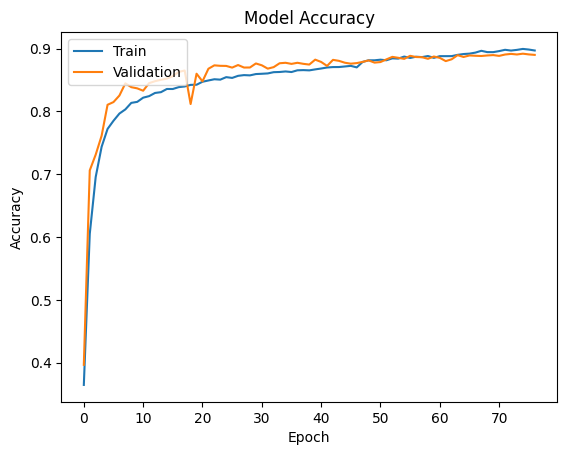

In [28]:
# Plot training history

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
!pip install seaborn

In [30]:
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the pretrained model
model = tf.keras.models.load_model('CNND_VD01.h5')


In [31]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [32]:
import numpy as np

test_data = np.array(x_test)
test_labels = np.array(y_test)

test_data = tf.convert_to_tensor(test_data)
test_labels = tf.convert_to_tensor(test_labels)

In [33]:
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Test loss: {loss:.3f}, Test accuracy: {accuracy:.3f}')

375/375 [==============================] - 65s 173ms/step - loss: 0.2904 - accuracy: 0.8892
Test loss: 0.290, Test accuracy: 0.889


In [34]:
# Predict on the test data
predictions = model.predict(test_data)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

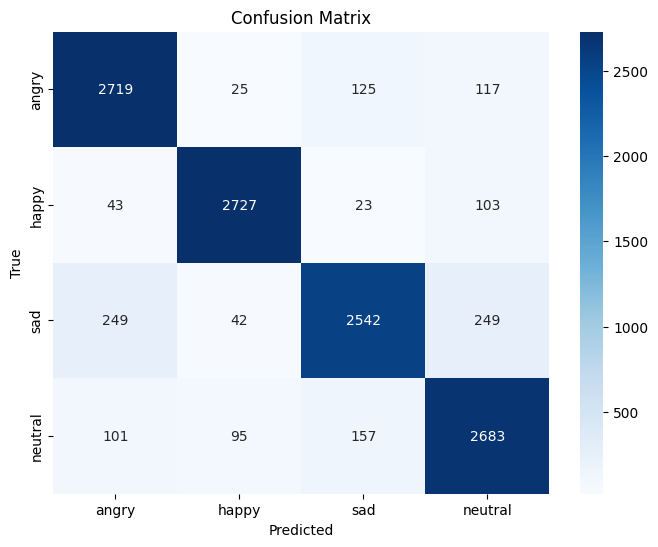

In [35]:
# Calculate the confusion matrix
confusion_mat = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

In [36]:
# Print classification report for more detailed metrics
class_report = classification_report(test_labels, predicted_labels, target_names=classes)
print(class_report)

              precision    recall  f1-score   support

       angry       0.87      0.91      0.89      2986
       happy       0.94      0.94      0.94      2896
         sad       0.89      0.82      0.86      3082
     neutral       0.85      0.88      0.87      3036

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

